## Basit Doğrusal Regresyon

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [194]:
ad=pd.read_csv("advertising.csv")

In [195]:
df=ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [196]:
df=df.iloc[:,1:len(df)]

In [197]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [199]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [200]:
df.isnull().values.any()

False

In [201]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [202]:
import seaborn as sns

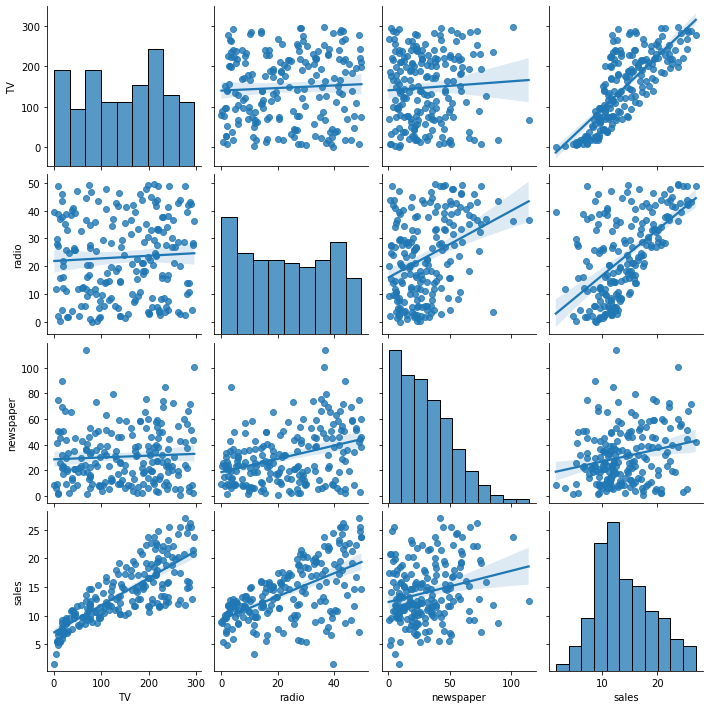

In [203]:
sns.pairplot(df,kind="reg");

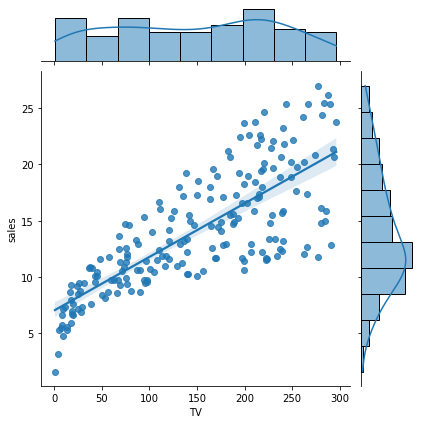

In [204]:
sns.jointplot(x="TV",y="sales",data=df,kind="reg");

### Statsmodels ile Modelleme

In [205]:
import statsmodels.api as sm

In [206]:
X=df[["TV"]]

In [207]:
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [208]:
X=sm.add_constant(X)
X[0:5]

D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [209]:
y=df["sales"]

In [210]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [211]:
lm=sm.OLS(y,X)

In [212]:
model=lm.fit()

In [213]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 02 Feb 2022   Prob (F-statistic):           1.47e-42
Time:                        19:43:53   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [214]:
import statsmodels.formula.api as smf

In [215]:
lm=smf.ols("sales ~ TV",df)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 02 Feb 2022   Prob (F-statistic):           1.47e-42
Time:                        19:43:53   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [216]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [217]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [218]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [219]:
model.f_pvalue

1.4673897001947095e-42

In [220]:
print("fvalue : ","%.3f" % model.fvalue)

fvalue :  312.145


In [221]:
model.tvalues

Intercept    15.360275
TV           17.667626
dtype: float64

In [222]:
print("fvalue : ","%.3f" % model.tvalues[0])

fvalue :  15.360


In [223]:
model.mse_model

3314.6181668686486

In [224]:
model.rsquared

0.611875050850071

model.rsquared_adj

**model kurduk model içinden tahmin ettiğimiz y değerleri**

In [225]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

**Modeldeki gerçek y değerleri**

In [226]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [227]:
print("Sales  ="+str("%.2f" %  model.params[0])+"  +  TV  "+" * "+str("%.2f"% model.params[1]))

Sales  =7.03  +  TV   * 0.05


**Modelin Grafiksel gösterimi**

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


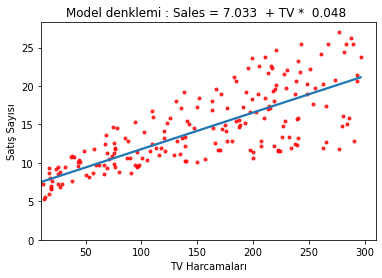

In [228]:
g=sns.regplot(df.TV,df.sales,ci=None,scatter_kws={'color':'r','s':9});
g.set_title("Model denklemi : Sales = %.3f  + TV *  %.3f " % (model.params[0],model.params[1]))
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(10,310)
plt.ylim(bottom=0);

In [229]:
from sklearn.linear_model import LinearRegression

In [230]:
X=df[["TV"]]
y=df["sales"]
reg=LinearRegression()
model=reg.fit(X,y)
model.intercept_
model.coef_

array([0.04753664])

y=b0+b1*xi

coef b1 katsayısı intercept b0  x bağımsız değişken y bağımlı değişken

bu skor başarı tahmin değeri değildir.Bu skor r kare değeridir.

In [231]:
model.score(X,y)

0.611875050850071

In [232]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

## Tahmin 

Model Denklemi : 7.03 + TV * 0.04

Örneğin: 30 birim TV  harcaması  olduğunda satışların tahmini değeri ne olur ?

In [233]:
7.03+30*0.0475

8.455

In [234]:
X=df[["TV"]]
y=df["sales"]
reg=LinearRegression()
model=reg.fit(X,y)

In [235]:
model.predict([[30]])

array([8.45869276])

In [236]:
yeni_veri=[[5],[90],[200]]

In [237]:
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

## Artıklar ve Makine Öğrenmesindeki Önemi

In [238]:
from sklearn.metrics  import mean_squared_error,r2_score

In [239]:
lm=smf.ols("sales ~ TV",df)

In [240]:
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 02 Feb 2022   Prob (F-statistic):           1.47e-42
Time:                        19:43:53   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [241]:
mse=mean_squared_error(y,model.fittedvalues)
mse

10.512652915656757

In [242]:
rmse=np.sqrt(mse)
rmse

3.2423221486546887

In [243]:
tahmin_y=reg.predict(X)[0:10]
tahmin_y

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [244]:
k_t=pd.DataFrame({"gercek_y":y[0:10],"tahmin_y": tahmin_y[0:10]})
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [245]:
k_t["hata"]=k_t.gercek_y-k_t.tahmin_y
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [246]:
k_t["hata_kare"]=k_t.hata**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [247]:
np.sum(k_t.hata_kare)

92.90350329638103

In [248]:
np.mean(k_t.hata_kare)

9.290350329638105

In [249]:
np.sqrt(np.mean(k_t.hata_kare))

3.048007599996776

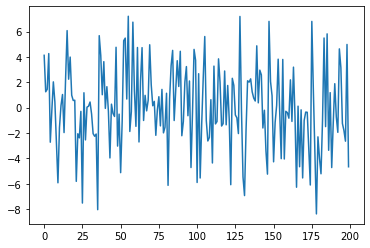

In [250]:
plt.plot(model.resid);